# Demo 绘制散点图

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
good  = [[1, 0], [12, 0], [3, 0], [11, 0], [13, 0], [4, 0], [15, 0], [14, 0], [20, 0]]
bad = [[24, 1], [46, 1], [67, 1], [88, 1], [34, 1], [27, 1], [100, 1], [43, 1], [52, 1]]
total = good + bad
random.shuffle(total)
# result = stats.mannwhitneyu(good, bad, alternative='two-sided')
# plt.scatter(good, bad, alpha = 0.6)
# plt.show()
print(total)

[[3, 0], [15, 0], [27, 1], [34, 1], [12, 0], [52, 1], [1, 0], [13, 0], [11, 0], [14, 0], [24, 1], [20, 0], [67, 1], [100, 1], [88, 1], [46, 1], [43, 1], [4, 0]]


In [117]:
value = [total[i][0] for i in range(len(total))]
label = [total[i][1] for i in range(len(total))]
print(value)
print(label)

[3, 15, 27, 34, 12, 52, 1, 13, 11, 14, 24, 20, 67, 100, 88, 46, 43, 4]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]


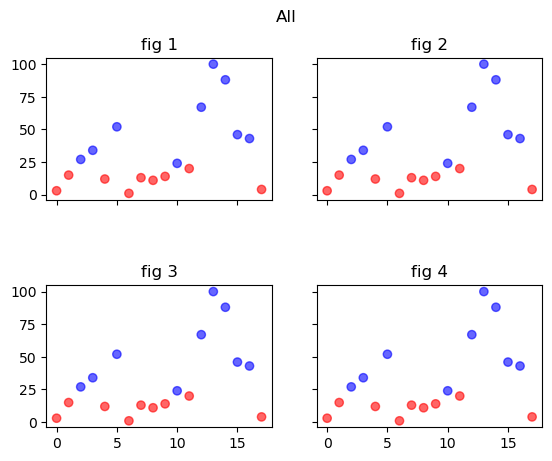

In [118]:
ind = []
for i in range(len(total)):
    ind.append(i)
colors = ['red', 'blue']
col = []
for j in label:
    col.append(colors[j])

    
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.6)
for a in range(2):
    for b in range(2):
        axs[a, b].scatter(ind, value, c=col, alpha = 0.6)
        axs[a, b].set_title("fig " + str(a*2 + b+1))
plt.suptitle("All")
plt.show()

# 数据集数据测试

In [34]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('totalData.csv')

/var/folders/m5/dt3s3vkd22qczttvdhqg9j6c0000gn/T/ipykernel_4735/2249502836.py:1: DtypeWarning: Columns (26,48,56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('totalData.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616541 entries, 0 to 2616540
Data columns (total 86 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  float64
 4    Destination IP               object 
 5    Destination Port             float64
 6    Protocol                     float64
 7    Timestamp                    object 
 8    Flow Duration                float64
 9    Total Fwd Packets            float64
 10   Total Backward Packets       float64
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616541 entries, 0 to 2616540
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  float64
 3   Destination IP               object 
 4   Destination Port             float64
 5   Protocol                     float64
 6   Timestamp                    object 
 7   Flow Duration                float64
 8   Total Fwd Packets            float64
 9   Total Backward Packets       float64
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  

In [9]:
df.isnull().sum()

Flow ID              4
Source IP            0
Source Port          0
Destination IP       0
Destination Port     0
                    ..
Idle Mean           11
Idle Std            11
Idle Max            11
Idle Min            11
Label               11
Length: 85, dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 85, dtype: int64

In [11]:
# 处理数据类型
df[['Flow IAT Min', 'Packet Length Std', 'CWE Flag Count', 'Down/Up Ratio', 'Fwd Avg Bytes/Bulk']] = df[['Flow IAT Min', 'Packet Length Std', 'CWE Flag Count', 'Down/Up Ratio', 'Fwd Avg Bytes/Bulk']].astype(np.float64)
df[['Source Port', 'Destination Port', 'Protocol']] = df[['Source Port', 'Destination Port', 'Protocol']].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2616528 entries, 0 to 2616540
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow Duration                float64
 8   Total Fwd Packets            float64
 9   Total Backward Packets       float64
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  Bwd P

In [12]:
# 分列，添加二级标签
'''
枚举值：
广告软件（Adware）
勒索软件（Ransomware）
恐吓软件（Scareware）
短信恶意软件（SMS Malware）
良性流量（Benign）
'''
df.loc[:, 'Label_2'] = df['Label'].str.split('_', n=1, expand=True)[0]
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_2
0,222.73.31.32-10.42.0.211-8288-39461-6,10.42.0.211,39461,222.73.31.32,8288,6,30/06/2017 11:57:27,760582.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE
1,157.240.2.36-10.42.0.211-443-46297-6,157.240.2.36,443,10.42.0.211,46297,6,30/06/2017 11:57:29,40.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE
2,157.240.2.36-10.42.0.211-443-46297-6,10.42.0.211,46297,157.240.2.36,443,6,30/06/2017 11:57:29,701.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE
3,222.73.31.32-10.42.0.211-8288-52296-6,10.42.0.211,52296,222.73.31.32,8288,6,30/06/2017 11:57:28,816661.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE
4,172.217.10.14-10.42.0.211-443-43513-6,10.42.0.211,43513,172.217.10.14,443,6,30/06/2017 11:57:29,25.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE


In [13]:
# 条件判断，添加一级标签
'''
恶意流量（Bad/1）包括：广告软件（Adware）、勒索软件（Ransomware）、恐吓软件（Scareware）、短信恶意软件（SMS Malware）
良性流量（Good/0）包括：良性流量（Benign）
'''
def label1(x):
    if x['Label_2'] == 'BENIGN':
        return 0
    else:
        return 1
df.loc[:, 'Label_1'] = df.apply(label1, axis=1)
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_2,Label_1
0,222.73.31.32-10.42.0.211-8288-39461-6,10.42.0.211,39461,222.73.31.32,8288,6,30/06/2017 11:57:27,760582.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE,1
1,157.240.2.36-10.42.0.211-443-46297-6,157.240.2.36,443,10.42.0.211,46297,6,30/06/2017 11:57:29,40.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE,1
2,157.240.2.36-10.42.0.211-443-46297-6,10.42.0.211,46297,157.240.2.36,443,6,30/06/2017 11:57:29,701.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE,1
3,222.73.31.32-10.42.0.211-8288-52296-6,10.42.0.211,52296,222.73.31.32,8288,6,30/06/2017 11:57:28,816661.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE,1
4,172.217.10.14-10.42.0.211-443-43513-6,10.42.0.211,43513,172.217.10.14,443,6,30/06/2017 11:57:29,25.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_JIFAKE,SMSMALWARE,1


In [14]:
print(df['Source Port'])

0          39461
1            443
2          46297
3          52296
4          43513
           ...  
2616536    60273
2616537     5353
2616538    51872
2616539    60774
2616540    60774
Name: Source Port, Length: 2616528, dtype: int64


In [15]:
t_tensor = df['Source Port']
test = t_tensor.values
print(test, type(test))

[39461   443 46297 ... 51872 60774 60774] <class 'numpy.ndarray'>


In [16]:
def get_tensor(flag):
    x = df['Source Port']
    ind = tf.where(df['Label_1'] == flag)
    y = tf.gather_nd(x, ind)
    return y

good = get_tensor(0)
bad = get_tensor(1)
good_array = good.numpy()
bad_array = bad.numpy()
print(good_array)
print(bad_array)

[41381 41285 56846 ...  3589 60774 54828]
[39461   443 46297 ... 51872 60774 60774]


2023-06-24 17:49:15.946201: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
goodlt = good_array.tolist()
badlt = bad_array.tolist()

In [19]:
label0 = []
label1 = []
for i in range(len(goodlt)):
    label0.append(0)
for i in range(len(badlt)):
    label1.append(1)
totalData = goodlt + badlt
totalLabel = label0 + label1

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [36]:
ind = []
for i in range(len(totalData)):
    ind.append(i)
colors = ['red', 'blue']
col = []
for j in totalLabel:
    col.append(colors[j])

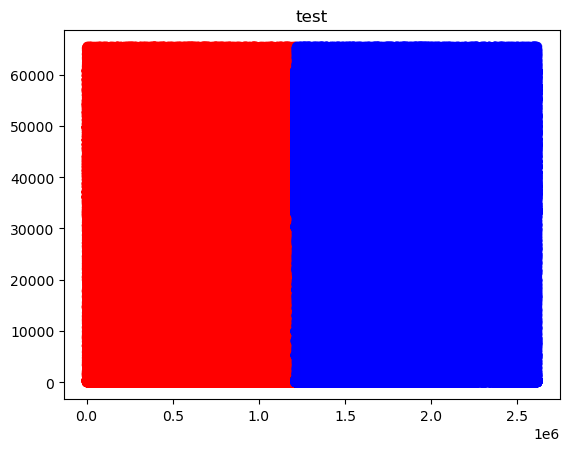

In [37]:
# fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"), sharex=True, sharey=True)
# fig.subplots_adjust(hspace=0.6)
# for a in range(2):
#     for b in range(2):
#         axs[a, b].scatter(ind, value, c=col, alpha = 0.6)
#         axs[a, b].set_title("fig " + str(a*2 + b+1))
plt.scatter(ind, totalData, c=col, alpha=0.6)
plt.title("test")
plt.show()

In [45]:
port = [[totalData[i], totalLabel[i]] for i in range(len(totalData))]

In [47]:
import random
random.shuffle(port)
samplelt = random.sample(port, 700)
# print(samplelt)

In [42]:
check = port[:15]
print(check)

[[57050, 1], [37888, 1], [58769, 1], [36619, 1], [10317, 1], [40777, 0], [23229, 1], [80, 1], [41005, 1], [37816, 1], [54501, 0], [5420, 1], [42033, 0], [80, 0], [38637, 1]]


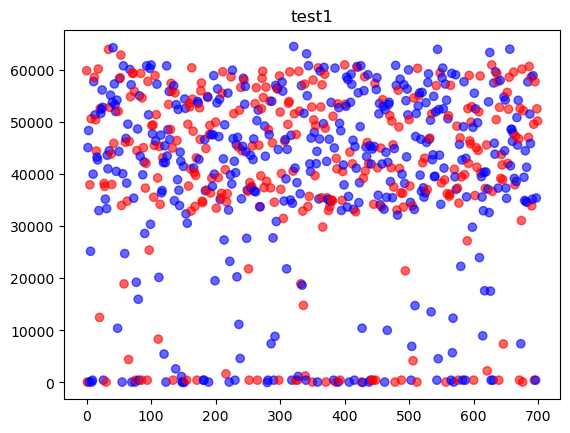

In [48]:
shuffle_value = [samplelt[i][0] for i in range(len(samplelt))]
shuffle_label = [samplelt[i][1] for i in range(len(samplelt))]
ind = []
for i in range(len(shuffle_value)):
    ind.append(i)
colors = ['red', 'blue']
col = []
for j in shuffle_label:
    col.append(colors[j])
    
plt.scatter(ind, shuffle_value, c=col, alpha=0.6)
plt.title("test1")
plt.show()

In [104]:
# Fwd IAT Mean
def get_tensor(flag):
    x = df['Flow Duration']
    ind = tf.where(df['Label_1'] == flag)
    y = tf.gather_nd(x, ind)
    return y

good = get_tensor(0)
bad = get_tensor(1)
good_array = good.numpy()
bad_array = bad.numpy()
print(good_array)
print(bad_array)
goodlt = good_array.tolist()
badlt = bad_array.tolist()
# label0 = []
# label1 = []
# for i in range(len(goodlt)):
#     label0.append(0)
# for i in range(len(badlt)):
#     label1.append(1)
# totalData = goodlt + badlt
# totalLabel = label0 + label1

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# port = [[totalData[i], totalLabel[i]] for i in range(len(totalData))]

# import random
# random.shuffle(port)
# samplelt = random.sample(port, 700)
# shuffle_value = [samplelt[i][0] for i in range(len(samplelt))]
# shuffle_label = [samplelt[i][1] for i in range(len(samplelt))]
# ind = []
# for i in range(len(shuffle_value)):
#     ind.append(i)
# colors = ['red', 'blue']
# col = []
# for j in shuffle_label:
#     col.append(colors[j])
    
# plt.scatter(ind, shuffle_value, c=col, alpha=0.6)
# plt.title("test")
# plt.show()

[3.1892000e+04 4.4900000e+02 1.0324700e+05 ... 1.4769400e+05 1.6596575e+07
 2.6024500e+05]
[7.605820e+05 4.000000e+01 7.010000e+02 ... 7.630000e+02 9.143777e+06
 9.781700e+04]


### BoxPlot

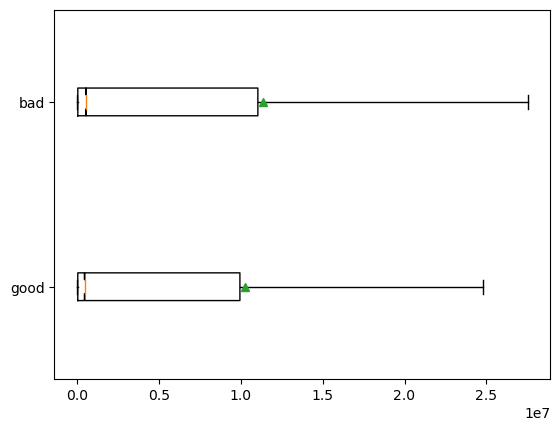

In [105]:
labels = 'good','bad'
# goodsample = random.sample(goodlt, 100)
# badsample = random.sample(badlt, 100)
plt.boxplot([goodlt, badlt], labels=labels, vert=False, showmeans=True, showcaps=True, notch=True, showfliers=False)
plt.show()

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

f_list = ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label_1']

def get_tensor(flag, f):
    x = df[f]
    ind = tf.where(df['Label_1'] == flag)
    y = tf.gather_nd(x, ind)
    return y

def plt_box(f):
    good = get_tensor(0, f)
    bad = get_tensor(1, f)
    good_array = good.numpy()
    bad_array = bad.numpy()
    print(good_array)
    print(bad_array)
    goodlt = good_array.tolist()
    badlt = bad_array.tolist()
    labels = 'good','bad'
    plt.boxplot([goodlt, badlt], labels=labels, vert=False, showmeans=True, showcaps=True, notch=True, showfliers=False)
    plt.show()

[3.1892000e+04 4.4900000e+02 1.0324700e+05 ... 1.4769400e+05 1.6596575e+07
 2.6024500e+05]
[7.605820e+05 4.000000e+01 7.010000e+02 ... 7.630000e+02 9.143777e+06
 9.781700e+04]


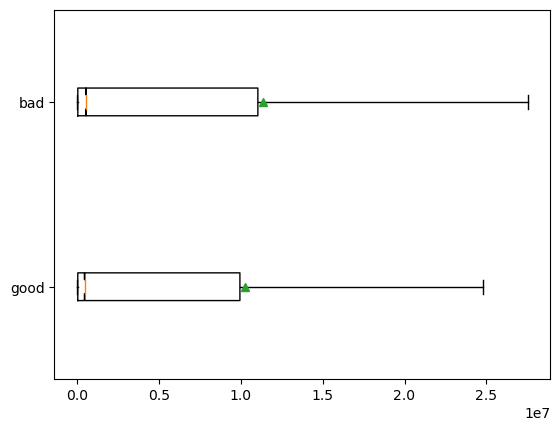

In [109]:
f = 'Flow Duration'
plt_box(f)

In [112]:
print(f_list)

['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Se

In [128]:
sample_f = random.sample(f_list, 6)
print(sample_f)

['Flow IAT Mean', 'Down/Up Ratio', 'Packet Length Mean', 'Fwd IAT Min', 'Bwd IAT Max', 'Flow Duration']


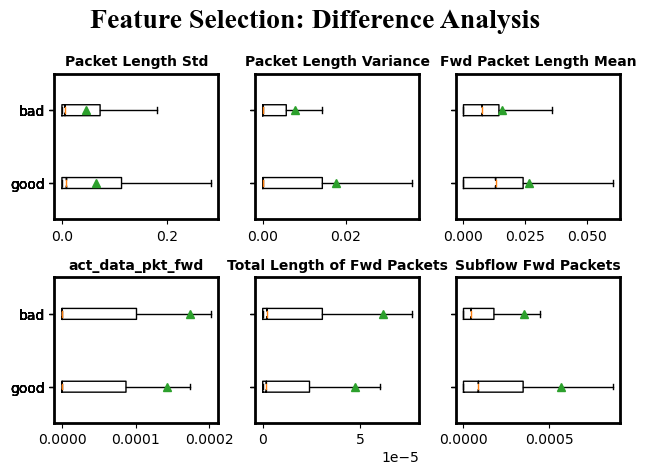

In [177]:
import math
def Log_lt(lt):
    lnlt = []
    for item in lt:
        item =item + 1
        ln_item = math.log(item)
        lnlt.append(ln_item)
    return lnlt

def zscorenormalization(lt):
    mean_ = np.mean(lt)
    std_ = np.var(lt)
    x = (lt - mean_) / std_
    return x

def Normal01(lt):
    min_ = np.min(lt)
    max_ = np.max(lt)
    x = (lt - min_) / (max_ - min_)
    return x

def plt_sub_box(f, axs, a, b):
    good = get_tensor(0, f)
    bad = get_tensor(1, f)
    good_array = good.numpy()
    bad_array = bad.numpy()
    good_array = Normal01(good_array)
    bad_array = Normal01(bad_array)
    # print(good_array)
    # print(bad_array)
    goodlt = good_array.tolist()
    badlt = bad_array.tolist()
    goodlt = Log_lt(goodlt)
    badlt = Log_lt(badlt)
    labels = 'good','bad'
    axs[a, b].boxplot([goodlt, badlt], labels=labels, vert=False, showmeans=True, showcaps=True, notch=True, showfliers=False)
    axs[a, b].set_title(f, fontsize=10, fontweight='bold')
    axs[a, b].spines['right'].set_linewidth(2)
    axs[a, b].spines['left'].set_linewidth(2)
    axs[a, b].spines['bottom'].set_linewidth(2)
    axs[a, b].spines['top'].set_linewidth(2)

# sample_f = random.sample(f_list, 6)
# print(sample_f)
fig, axs = plt.subplots(2, 3, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for a in range(2):
    for b in range(3):
        f_ind = a*3+b
        f = sample_f[f_ind]
        plt_sub_box(f, axs, a, b)
plt.suptitle("Feature Selection: Difference Analysis", fontweight='bold', fontfamily='Times New Roman', fontsize=20)
plt.tight_layout()
plt.savefig('特征选择差异比较图_plus取对数.png')
plt.show()